In [241]:
#import libraries:
import numpy as np
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib
import descartes
from shapely.geometry import Point, Polygon
from matplotlib import style
style.use("seaborn-darkgrid")


In [168]:
#read in dataset:
dat = pd.read_csv("c:/users/workman/documents/STA_160_S22/Fire_db.csv")
dat

c:\Users\Wyatt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,8,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE
0,FS-1418826,BJ8K,FOUNTAIN,2005,2005-02-02,1300.0,9.0,Miscellaneous,2005-02-02,0.10,A,40.036944,-121.005833,63.0,Plumas,CA
1,FS-1418827,AAC0,PIGEON,2004,2004-05-12,845.0,1.0,Lightning,2004-05-12,0.25,A,38.933056,-120.404444,61.0,Placer,CA
2,FS-1418835,A32W,SLACK,2004,2004-05-31,1921.0,5.0,Debris Burning,2004-05-31,0.10,A,38.984167,-120.735556,17.0,El Dorado,CA
3,FS-1418845,NaN,DEER,2004,2004-06-28,1600.0,1.0,Lightning,2004-07-03,0.10,A,38.559167,-119.913333,3.0,Alpine,CA
4,FS-1418847,NaN,STEVENOT,2004,2004-06-28,1600.0,1.0,Lightning,2004-07-03,0.10,A,38.559167,-119.933056,3.0,Alpine,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189545,2015CAIRS29019636,NaN,ODESSA 2,2015,2015-09-26,1726.0,13.0,Missing/Undefined,2015-09-26,0.01,A,40.481637,-122.389375,NaN,NaN,CA
189546,2015CAIRS29217935,NaN,NaN,2015,2015-10-05,126.0,9.0,Miscellaneous,NaN,0.20,A,37.617619,-120.938570,NaN,NaN,CA
189547,2015CAIRS28364460,NaN,NaN,2015,2015-05-02,2052.0,13.0,Missing/Undefined,NaN,0.10,A,37.617619,-120.938570,NaN,NaN,CA
189548,2015CAIRS29218079,NaN,NaN,2015,2015-10-14,2309.0,13.0,Missing/Undefined,NaN,2.00,B,37.672235,-120.898356,NaN,NaN,CA


In [169]:
#remove all NA values: 
dat = dat.dropna(axis = 0)

In [170]:
dat

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE
0,FS-1418826,BJ8K,FOUNTAIN,2005,2005-02-02,1300.0,9.0,Miscellaneous,2005-02-02,0.10,A,40.036944,-121.005833,63.0,Plumas,CA
1,FS-1418827,AAC0,PIGEON,2004,2004-05-12,845.0,1.0,Lightning,2004-05-12,0.25,A,38.933056,-120.404444,61.0,Placer,CA
2,FS-1418835,A32W,SLACK,2004,2004-05-31,1921.0,5.0,Debris Burning,2004-05-31,0.10,A,38.984167,-120.735556,17.0,El Dorado,CA
17,FS-1418881,BHA3,FREDS,2004,2004-10-13,1618.0,2.0,Equipment Use,2004-10-17,7700.00,G,38.780000,-120.260000,17.0,El Dorado,CA
23,FS-1419089,BEZ8,HOT SPRINGS,2005,2005-05-06,1145.0,5.0,Debris Burning,2005-05-09,0.10,A,38.700278,-119.840556,3.0,Alpine,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177324,FWS-2015USCASWRJ42X,J42X,POOL 11,2015,2015-10-23,1000.0,5.0,Debris Burning,2015-10-23,0.50,B,39.371051,-122.139002,11.0,Colusa,CA
177325,FWS-2015USCASJRJ31F,J31F,ALFALFA,2015,2015-09-24,900.0,13.0,Missing/Undefined,2015-09-24,0.10,A,37.193556,-120.841750,47.0,Merced,CA
177326,FWS-2015USCALURJH8F,JH8F,PARKING LOT 3,2015,2015-02-06,1300.0,9.0,Miscellaneous,2015-02-06,0.10,A,37.192558,-120.824639,47.0,Merced,CA
177329,FWS-2015USCAMDRJ3UT,J3UT,REFUGE,2015,2015-09-10,1700.0,9.0,Miscellaneous,2015-09-10,0.20,A,41.461000,-120.506434,49.0,Modoc,CA


In [171]:
#setup CA counties map:
county_map = gpd.read_file(r"C:\\Users\\Workman\\Documents\\STA_160_S22\\CA_Counties")
county_map = county_map.to_crs(crs="+proj=longlat +datum=WGS84 +no_defs")

In [211]:
#display data needed to create map of California (county-wise)
county_map.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


(-124.99955658006509,
 -113.61368275580395,
 32.054803159707554,
 42.483541846336834)

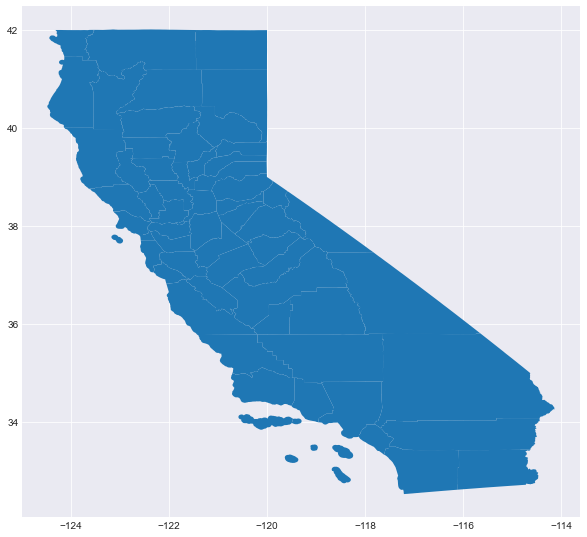

In [172]:
#visualize county map:
fig1, ax1 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax1)
ax1.axis("scaled")
#ax1.locator_params('y', nbins = 100)
#ax1.locator_params('x', nbins = 10)


In [173]:
axis = fig1.gca()
ymin, ymax = matplotlib.axes.Axes.get_ylim(axis)
xmin, xmax = matplotlib.axes.Axes.get_xlim(axis)
print(xmin, xmax)
print(ymin, ymax)

-124.99955658006509 -113.61368275580395
32.054803159707554 42.483541846336834


In [174]:
#create geometries that will be used to create points:
pt_geo = [Point(xy) for xy in zip(dat.LONGITUDE, dat.LATITUDE)]

In [175]:
#create a GeoDataFrame object with geometries:
geo_df = gpd.GeoDataFrame(dat,
                          crs = {'init':'epsg:4326'},
                          geometry = pt_geo)
geo_df

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
0,FS-1418826,BJ8K,FOUNTAIN,2005,2005-02-02,1300.0,9.0,Miscellaneous,2005-02-02,0.10,A,40.036944,-121.005833,63.0,Plumas,CA,POINT (-121.00583 40.03694)
1,FS-1418827,AAC0,PIGEON,2004,2004-05-12,845.0,1.0,Lightning,2004-05-12,0.25,A,38.933056,-120.404444,61.0,Placer,CA,POINT (-120.40444 38.93306)
2,FS-1418835,A32W,SLACK,2004,2004-05-31,1921.0,5.0,Debris Burning,2004-05-31,0.10,A,38.984167,-120.735556,17.0,El Dorado,CA,POINT (-120.73556 38.98417)
17,FS-1418881,BHA3,FREDS,2004,2004-10-13,1618.0,2.0,Equipment Use,2004-10-17,7700.00,G,38.780000,-120.260000,17.0,El Dorado,CA,POINT (-120.26000 38.78000)
23,FS-1419089,BEZ8,HOT SPRINGS,2005,2005-05-06,1145.0,5.0,Debris Burning,2005-05-09,0.10,A,38.700278,-119.840556,3.0,Alpine,CA,POINT (-119.84056 38.70028)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177324,FWS-2015USCASWRJ42X,J42X,POOL 11,2015,2015-10-23,1000.0,5.0,Debris Burning,2015-10-23,0.50,B,39.371051,-122.139002,11.0,Colusa,CA,POINT (-122.13900 39.37105)
177325,FWS-2015USCASJRJ31F,J31F,ALFALFA,2015,2015-09-24,900.0,13.0,Missing/Undefined,2015-09-24,0.10,A,37.193556,-120.841750,47.0,Merced,CA,POINT (-120.84175 37.19356)
177326,FWS-2015USCALURJH8F,JH8F,PARKING LOT 3,2015,2015-02-06,1300.0,9.0,Miscellaneous,2015-02-06,0.10,A,37.192558,-120.824639,47.0,Merced,CA,POINT (-120.82464 37.19256)
177329,FWS-2015USCAMDRJ3UT,J3UT,REFUGE,2015,2015-09-10,1700.0,9.0,Miscellaneous,2015-09-10,0.20,A,41.461000,-120.506434,49.0,Modoc,CA,POINT (-120.50643 41.46100)


In [176]:
#create subdataframe with wildfire causes of interest:
gdf2 = geo_df.copy()
causes = gdf2.where(gdf2.STAT_CAUSE_DESCR == "Lightning").dropna()
causes

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
1,FS-1418827,AAC0,PIGEON,2004.0,2004-05-12,845.0,1.0,Lightning,2004-05-12,0.25,A,38.933056,-120.404444,61.0,Placer,CA,POINT (-120.40444 38.93306)
26,FS-1419114,BEZ8,DEVIL'S GATE,2005.0,2005-07-18,1600.0,1.0,Lightning,2005-07-19,0.10,A,38.353611,-119.378056,51.0,Mono,CA,POINT (-119.37806 38.35361)
29,FS-1419180,BEZ8,WILLOW,2005.0,2005-06-17,1530.0,1.0,Lightning,2005-06-17,0.50,B,38.839722,-119.886389,3.0,Alpine,CA,POINT (-119.88639 38.83972)
31,FS-1419231,B1MV,BUCKEYE,2005.0,2005-07-22,1600.0,1.0,Lightning,2005-07-22,0.10,A,38.226667,-119.346667,51.0,Mono,CA,POINT (-119.34667 38.22667)
32,FS-1419239,BEZ8,SUMMERS,2005.0,2005-07-21,1700.0,1.0,Lightning,2005-07-21,0.10,A,38.168889,-119.316944,51.0,Mono,CA,POINT (-119.31694 38.16889)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177146,W-685089,WJY8,BUCK,2015.0,2015-07-05,1824.0,1.0,Lightning,2015-07-05,0.10,A,40.886400,-120.077800,35.0,Lassen,CA,POINT (-120.07780 40.88640)
177308,W-682753,JU13,FAYE,2015.0,2015-06-27,1800.0,1.0,Lightning,2015-06-28,0.10,A,38.864400,-119.814400,3.0,Alpine,CA,POINT (-119.81440 38.86440)
177309,W-682775,JY6N,DEXTER,2015.0,2015-07-18,1759.0,1.0,Lightning,2015-07-18,0.30,B,39.753300,-120.100800,35.0,Lassen,CA,POINT (-120.10080 39.75330)
177310,W-681080,EK10,SIBLEY,2015.0,2015-07-06,810.0,1.0,Lightning,2015-07-06,0.10,A,41.981300,-120.580300,49.0,Modoc,CA,POINT (-120.58030 41.98130)


In [177]:
#print unique fire causes:
print(geo_df["STAT_CAUSE_DESCR"].unique())

['Miscellaneous' 'Lightning' 'Debris Burning' 'Equipment Use' 'Arson'
 'Campfire' 'Smoking' 'Children' 'Railroad' 'Powerline' 'Fireworks'
 'Missing/Undefined' 'Structure']


<AxesSubplot:>

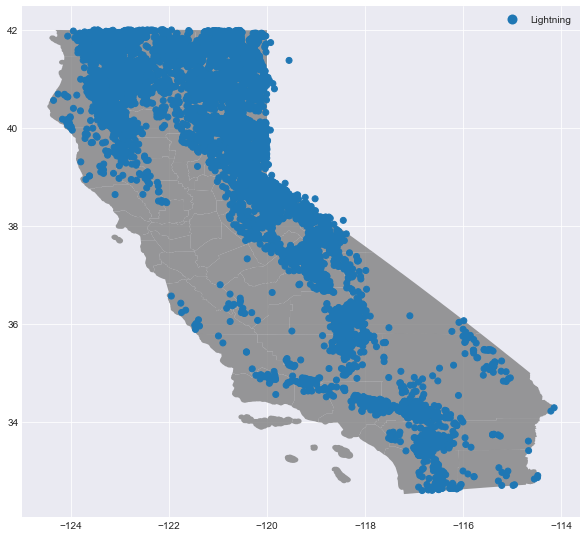

In [178]:
#visualize locations of lightning-caused wildfires:
fig1, ax1 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax1, color = "grey", alpha = 0.8)
causes.plot(column = "STAT_CAUSE_DESCR", ax = ax1, legend=True )


In [179]:
#setup dataframe for powerline-caused fires:
gdf3 = geo_df.copy()
powerlines = gdf3.where(gdf3.STAT_CAUSE_DESCR == "Powerline").dropna(axis=0)
powerlines


,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
35893,W-559472,D44Z,PGE 2,1998.0,1998-02-07,1044.0,11.0,Powerline,1998-02-07,0.10,A,36.569381,-121.951761,53.0,Monterey,CA,POINT (-121.95176 36.56938)
35905,W-559556,D44Z,UNNAMED FIRE 0545,1998.0,1998-04-26,1737.0,11.0,Powerline,1998-04-26,15.00,C,35.285642,-119.583617,29.0,Kern,CA,POINT (-119.58362 35.28564)
35911,W-559560,D44Z,UNNAMED FIRE 0856,1998.0,1998-04-30,1416.0,11.0,Powerline,1998-04-30,3.00,B,35.121514,-119.440553,29.0,Kern,CA,POINT (-119.44055 35.12151)
35913,W-559562,D44Z,UNNAMED FIRE 0516,1998.0,1998-04-30,1536.0,11.0,Powerline,1998-04-30,2.00,B,35.073436,-119.375692,29.0,Kern,CA,POINT (-119.37569 35.07344)
35917,W-559564,D44Z,UNNAMED FIRE 0732,1998.0,1998-05-01,2108.0,11.0,Powerline,1998-05-01,0.30,B,35.189033,-119.531172,29.0,Kern,CA,POINT (-119.53117 35.18903)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170343,FS-1521470,H6CE,HOBO,2014.0,2014-06-20,2130.0,11.0,Powerline,2014-06-21,0.13,A,40.819444,-123.123889,105.0,Trinity,CA,POINT (-123.12389 40.81944)
170358,FS-1522871,H92E,RAINIER,2014.0,2014-07-31,1550.0,11.0,Powerline,2014-08-05,1.40,B,40.861944,-122.820278,105.0,Trinity,CA,POINT (-122.82028 40.86194)
170361,FS-1525624,JEY5,ACKERMAN,2014.0,2014-09-18,2000.0,11.0,Powerline,2014-09-19,0.20,A,40.792500,-122.768056,105.0,Trinity,CA,POINT (-122.76806 40.79250)
170573,FS-1527860,JF3D,OXBOW,2014.0,2014-10-22,2209.0,11.0,Powerline,2014-10-22,0.10,A,39.006667,-120.743056,61.0,Placer,CA,POINT (-120.74306 39.00667)


<AxesSubplot:>

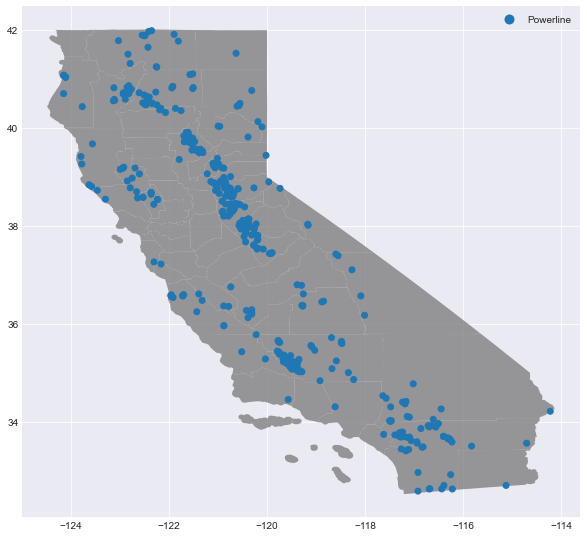

In [180]:
#visualize wild fires caused by powerline failure:
fig2, ax2 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax2, color = "grey", alpha = 0.8)
powerlines.plot(column = "STAT_CAUSE_DESCR", ax = ax2, legend=True )

In [181]:
#create dataframe for fires caused by camp fires:
gdf4 = geo_df.copy()
campfire = gdf4.where(gdf4.STAT_CAUSE_DESCR == "Campfire").dropna(axis=0)
campfire

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
64,FS-1419380,BZ6H,JANET,2005.0,2005-07-12,1400.0,4.0,Campfire,2005-07-12,0.10,A,38.054444,-119.251944,51.0,Mono,CA,POINT (-119.25194 38.05444)
109,FS-1420408,B30R,SUPRISE,2005.0,2005-08-11,1320.0,4.0,Campfire,2005-08-11,0.25,A,38.308889,-119.542778,51.0,Mono,CA,POINT (-119.54278 38.30889)
197,FS-1423031,BY5A,LOST,2005.0,2005-07-07,900.0,4.0,Campfire,2005-07-07,0.10,A,39.008333,-120.183333,61.0,Placer,CA,POINT (-120.18333 39.00833)
200,FS-1423039,B21R,POINT,2005.0,2005-08-03,830.0,4.0,Campfire,2005-08-03,0.10,A,38.941111,-120.051667,17.0,El Dorado,CA,POINT (-120.05167 38.94111)
637,FS-1427529,BE0C,SITE 14,2005.0,2005-08-27,1315.0,4.0,Campfire,2005-08-27,0.01,A,33.652500,-117.410556,59.0,Orange,CA,POINT (-117.41056 33.65250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176570,FS-6703857,J3YY,FALLS,2015.0,2015-09-26,2121.0,4.0,Campfire,2015-09-27,0.10,A,38.949722,-120.115278,17.0,El Dorado,CA,POINT (-120.11528 38.94972)
176602,W-684319,J3KD,CAMP 30,2015.0,2015-09-13,1251.0,4.0,Campfire,2015-09-13,0.10,A,34.071420,-116.391080,71.0,San Bernardino,CA,POINT (-116.39108 34.07142)
176621,W-677213,JJ2G,LONGHORN,2015.0,2015-03-08,1654.0,4.0,Campfire,2015-03-08,0.10,A,33.687979,-117.275669,65.0,Riverside,CA,POINT (-117.27567 33.68798)
176776,W-686156,J35S,TRAVERTINE,2015.0,2015-10-02,903.0,4.0,Campfire,2015-10-02,0.10,A,38.247100,-119.203597,51.0,Mono,CA,POINT (-119.20360 38.24710)


<AxesSubplot:>

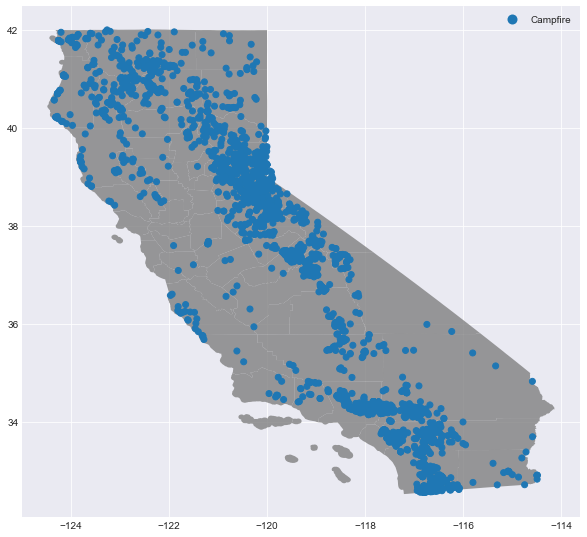

In [182]:
#visualize fires caused by camp fires:
fig3, ax3 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax3, color = "grey", alpha = 0.8)
campfire.plot(column = "STAT_CAUSE_DESCR", ax = ax3, legend=True )

In [183]:
#create dataframe for debris burning caused fires:
gdf5 = geo_df.copy()
debris = gdf5.where(gdf5.STAT_CAUSE_DESCR == "Debris Burning").dropna(axis=0)
debris

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
2,FS-1418835,A32W,SLACK,2004.0,2004-05-31,1921.0,5.0,Debris Burning,2004-05-31,0.1,A,38.984167,-120.735556,17.0,El Dorado,CA,POINT (-120.73556 38.98417)
23,FS-1419089,BEZ8,HOT SPRINGS,2005.0,2005-05-06,1145.0,5.0,Debris Burning,2005-05-09,0.1,A,38.700278,-119.840556,3.0,Alpine,CA,POINT (-119.84056 38.70028)
83,FS-1419737,BTA5,MAGNOLIA,2005.0,2005-06-02,1600.0,5.0,Debris Burning,2005-06-02,2.3,B,39.817222,-120.451111,63.0,Plumas,CA,POINT (-120.45111 39.81722)
182,FS-1422722,B6EU,JUNCTION,2005.0,2005-09-11,1505.0,5.0,Debris Burning,2005-09-11,0.1,A,39.951667,-120.914444,63.0,Plumas,CA,POINT (-120.91444 39.95167)
542,FS-1426855,B8W3,CHIP,2005.0,2005-11-06,1058.0,5.0,Debris Burning,2005-11-06,0.1,A,39.964722,-120.900000,63.0,Plumas,CA,POINT (-120.90000 39.96472)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176558,FS-6363541,J478,MUHELI,2015.0,2015-11-20,2300.0,5.0,Debris Burning,2015-11-21,0.1,A,38.210833,-120.000000,109.0,Tuolumne,CA,POINT (-120.00000 38.21083)
177098,W-685720,J3MB,DRY VALLEY,2015.0,2015-09-14,1357.0,5.0,Debris Burning,2015-09-15,5.0,B,39.971100,-120.016400,35.0,Lassen,CA,POINT (-120.01640 39.97110)
177322,FWS-2015USCASRRJY1Y,JY1Y,AFTON2,2015.0,2015-07-16,2130.0,5.0,Debris Burning,2015-07-17,0.5,B,39.411407,-121.991208,21.0,Glenn,CA,POINT (-121.99121 39.41141)
177324,FWS-2015USCASWRJ42X,J42X,POOL 11,2015.0,2015-10-23,1000.0,5.0,Debris Burning,2015-10-23,0.5,B,39.371051,-122.139002,11.0,Colusa,CA,POINT (-122.13900 39.37105)


<AxesSubplot:>

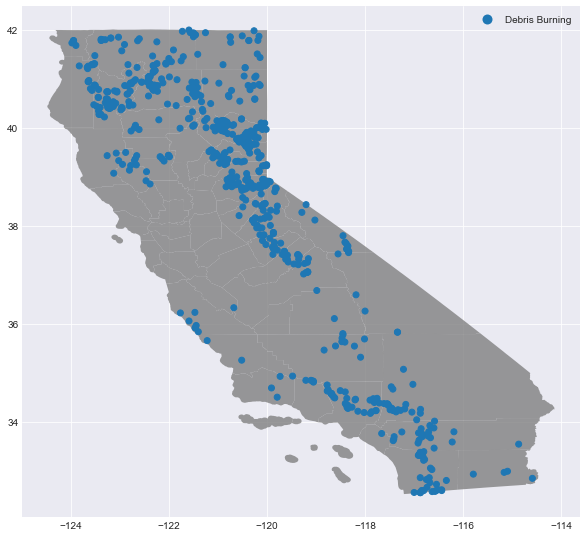

In [184]:
#visualize debris_caused fires:
fig5, ax5 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax5, color = "grey", alpha = 0.8)
debris.plot(column = "STAT_CAUSE_DESCR", ax = ax5, legend=True )

In [185]:
#dataframe for fires caused by equipment:
gdf6 = geo_df.copy()
equipment = gdf6.where(gdf6.STAT_CAUSE_DESCR == "Equipment Use").dropna(axis=0)
equipment

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
17,FS-1418881,BHA3,FREDS,2004.0,2004-10-13,1618.0,2.0,Equipment Use,2004-10-17,7700.00,G,38.780000,-120.260000,17.0,El Dorado,CA,POINT (-120.26000 38.78000)
113,FS-1420455,B34G,DITCH,2005.0,2005-08-13,1430.0,2.0,Equipment Use,2005-08-13,0.10,A,38.213056,-119.310278,51.0,Mono,CA,POINT (-119.31028 38.21306)
180,FS-1422417,B5Y3,VALLEY,2005.0,2005-09-05,1622.0,2.0,Equipment Use,2005-09-05,0.25,A,39.940556,-121.033611,63.0,Plumas,CA,POINT (-121.03361 39.94056)
921,FS-1431837,B6UX,FORD,2006.0,2006-01-17,1405.0,2.0,Equipment Use,2006-01-17,0.01,A,34.229722,-117.223056,71.0,San Bernardino,CA,POINT (-117.22306 34.22972)
939,FS-1431876,B7RL,VOYAGER,2006.0,2006-01-18,1249.0,2.0,Equipment Use,2006-01-18,0.10,A,34.463333,-118.341389,37.0,Los Angeles,CA,POINT (-118.34139 34.46333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176804,W-680261,JV3N,IDRIA,2015.0,2015-06-27,1016.0,2.0,Equipment Use,2015-06-27,2.00,B,36.555661,-120.840653,69.0,San Benito,CA,POINT (-120.84065 36.55566)
176810,W-686633,JZR5,WRAGG,2015.0,2015-07-22,1430.0,2.0,Equipment Use,2015-08-05,8051.00,G,38.505810,-122.111542,97.0,Sonoma,CA,POINT (-122.11154 38.50581)
177091,W-685709,J0SD,DODGE,2015.0,2015-08-03,1417.0,2.0,Equipment Use,2015-08-17,10570.00,G,40.963600,-120.114200,35.0,Lassen,CA,POINT (-120.11420 40.96360)
177097,W-685135,J3C7,BROWNS,2015.0,2015-09-08,1556.0,2.0,Equipment Use,2015-09-08,35.00,C,40.695600,-122.928900,105.0,Trinity,CA,POINT (-122.92890 40.69560)


<AxesSubplot:>

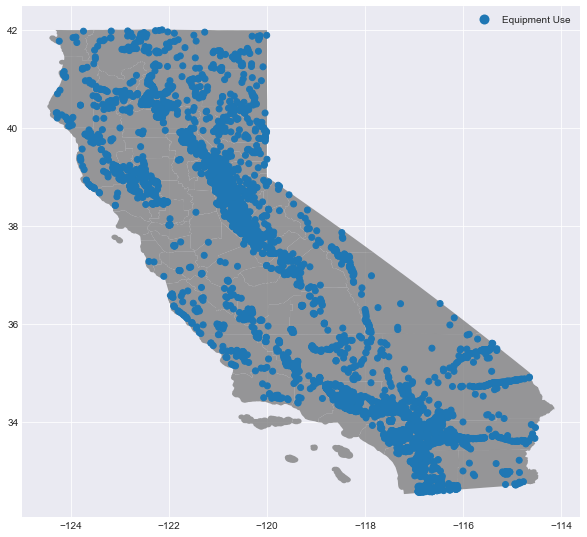

In [186]:
#visualize fires caused by equipment:
fig6, ax6 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax6, color = "grey", alpha = 0.8)
equipment.plot(column = "STAT_CAUSE_DESCR", ax = ax6, legend=True )

In [187]:
#dataframe for fires caused by children:
gdf7 = geo_df.copy()
children = gdf7.where(gdf7.STAT_CAUSE_DESCR == "Children").dropna(axis=0)
children

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
730,FS-1428685,BX2A,EMERALD,2005.0,2005-07-03,1530.0,8.0,Children,2005-07-03,0.10,A,38.940000,-120.046667,61.0,Placer,CA,POINT (-120.04667 38.94000)
960,FS-1432053,B6UL,VETERANS,2006.0,2006-01-08,1345.0,8.0,Children,2006-01-08,0.25,A,34.329444,-118.417500,37.0,Los Angeles,CA,POINT (-118.41750 34.32944)
1018,FS-1434017,B7RL,ROBIN,2006.0,2006-05-28,1908.0,8.0,Children,2006-05-28,0.50,B,34.439167,-118.275833,37.0,Los Angeles,CA,POINT (-118.27583 34.43917)
1076,FS-1434635,B7NY,CALPINE,2006.0,2006-06-17,1005.0,8.0,Children,2006-06-17,0.10,A,39.652222,-120.419167,91.0,Sierra,CA,POINT (-120.41917 39.65222)
1122,FS-1434966,B7RL,AVOCADO,2006.0,2006-07-01,1137.0,8.0,Children,2006-07-01,0.10,A,34.468333,-118.534722,37.0,Los Angeles,CA,POINT (-118.53472 34.46833)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170158,FS-1520881,H2D6,CLEG,2014.0,2014-03-16,1551.0,8.0,Children,2014-03-16,2.50,B,34.261111,-117.423611,71.0,San Bernardino,CA,POINT (-117.42361 34.26111)
171269,W-667041,H2CF,SCOTT,2014.0,2014-03-13,1541.0,8.0,Children,2014-03-13,0.10,A,39.738110,-120.059310,35.0,Lassen,CA,POINT (-120.05931 39.73811)
175089,FS-6353329,EK1Y,CASITAS,2015.0,2015-09-04,1725.0,8.0,Children,2015-09-04,0.10,A,34.408333,-119.350278,111.0,Ventura,CA,POINT (-119.35028 34.40833)
175654,FS-6700655,J1B0,MILTON,2015.0,2015-08-09,2354.0,8.0,Children,2015-08-10,0.10,A,39.535833,-120.588333,61.0,Placer,CA,POINT (-120.58833 39.53583)


<AxesSubplot:>

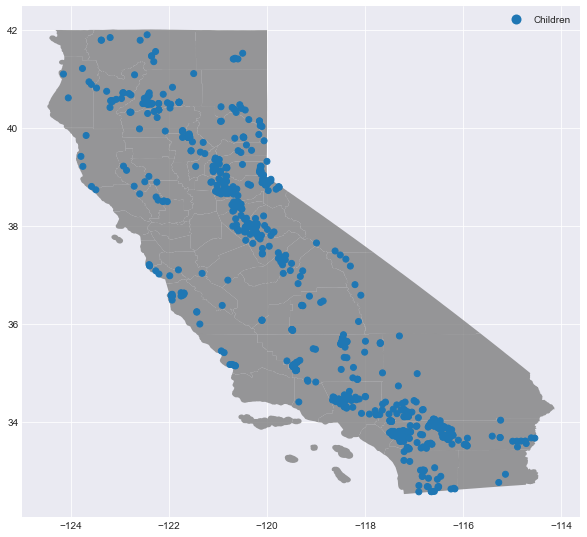

In [188]:
#visualize fires caused by children:
fig7, ax7 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax7, color = "grey", alpha = 0.8)
children.plot(column = "STAT_CAUSE_DESCR", ax = ax7, legend=True )

In [189]:
#dataframe for fires caused by arson:
gdf8 = geo_df.copy()
arson = gdf8.where(gdf8.STAT_CAUSE_DESCR == "Arson").dropna(axis=0)
arson

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
24,FS-1419090,BZB0,SHINGLE,2005.0,2005-07-08,15.0,7.0,Arson,2005-07-08,0.01,A,38.453611,-119.458611,51.0,Mono,CA,POINT (-119.45861 38.45361)
101,FS-1420114,B1FK,JACKASS,2005.0,2005-07-21,1745.0,7.0,Arson,2005-07-21,0.20,A,39.579722,-121.125278,7.0,Butte,CA,POINT (-121.12528 39.57972)
243,FS-1423990,B7QT,TRUMBULL,2005.0,2005-10-02,1000.0,7.0,Arson,2005-10-02,0.25,A,38.062500,-119.240833,51.0,Mono,CA,POINT (-119.24083 38.06250)
819,FS-1429442,B9BG,PILE,2005.0,2005-11-21,715.0,7.0,Arson,2005-11-21,11.00,C,40.261667,-123.378333,105.0,Trinity,CA,POINT (-123.37833 40.26167)
867,FS-1430558,B9VX,BECKWOURTH,2005.0,2005-12-17,1000.0,7.0,Arson,2005-12-17,0.20,A,39.861667,-120.383056,63.0,Plumas,CA,POINT (-120.38306 39.86167)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176192,FS-6313227,JMP1,EDEN,2015.0,2015-04-13,1800.0,7.0,Arson,2015-04-13,4.50,B,41.267500,-122.881944,93.0,Siskiyou,CA,POINT (-122.88194 41.26750)
176285,FS-6359557,J4Y1,OAK BOTTOM,2015.0,2015-11-02,1347.0,7.0,Arson,2015-11-02,0.10,A,41.375556,-123.449722,93.0,Siskiyou,CA,POINT (-123.44972 41.37556)
176360,FS-6344598,J2GJ,SANDY,2015.0,2015-08-22,920.0,7.0,Arson,2015-08-22,0.25,A,39.908611,-121.184444,63.0,Plumas,CA,POINT (-121.18444 39.90861)
176497,FS-6338543,J06C,PINE,2015.0,2015-08-10,500.0,7.0,Arson,2015-08-10,0.20,A,40.751667,-122.785000,105.0,Trinity,CA,POINT (-122.78500 40.75167)


<AxesSubplot:>

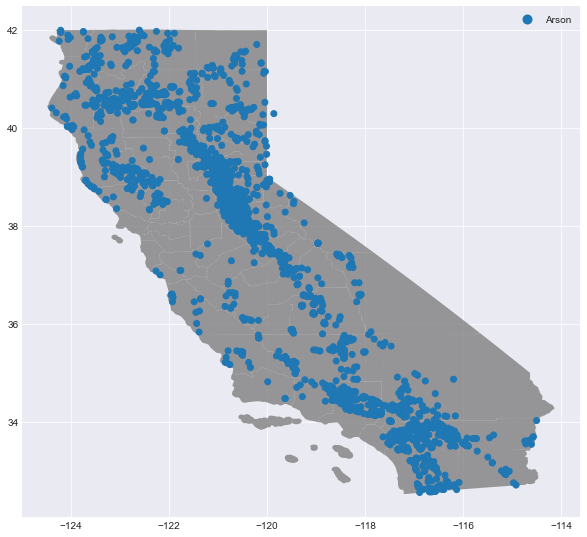

In [190]:
#visualize fires caused by arson:
fig8, ax8 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax8, color = "grey", alpha = 0.8)
arson.plot(column = "STAT_CAUSE_DESCR", ax = ax8, legend=True )

In [191]:
#dataframe for fires caused by smoking:
gdf9 = geo_df.copy()
smoking = gdf9.where(gdf9.STAT_CAUSE_DESCR == "Smoking").dropna(axis=0)
smoking

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
729,FS-1428680,BXM4,KIVA 3,2005.0,2005-07-01,2300.0,3.0,Smoking,2005-07-02,0.10,A,38.940000,-120.046667,61.0,Placer,CA,POINT (-120.04667 38.94000)
735,FS-1428716,B79E,BILTMORE,2005.0,2005-10-14,245.0,3.0,Smoking,2005-10-14,0.10,A,38.216667,-120.126667,57.0,Nevada,CA,POINT (-120.12667 38.21667)
1299,FS-1436095,CUT4,LONG,2006.0,2006-07-02,2322.0,3.0,Smoking,2006-07-03,1.00,B,38.085556,-120.101389,109.0,Tuolumne,CA,POINT (-120.10139 38.08556)
1345,FS-1436662,B6UL,POSEY,2006.0,2006-07-11,1651.0,3.0,Smoking,2006-07-11,0.10,A,34.651944,-118.752778,37.0,Los Angeles,CA,POINT (-118.75278 34.65194)
1398,FS-1437062,C11H,HILL,2006.0,2006-07-29,1100.0,3.0,Smoking,2006-07-29,0.25,A,39.383889,-120.126667,57.0,Nevada,CA,POINT (-120.12667 39.38389)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175808,FS-6700592,J5H4,ALISO,2015.0,2015-12-09,1118.0,3.0,Smoking,2015-12-09,0.10,A,34.441667,-118.148611,37.0,Los Angeles,CA,POINT (-118.14861 34.44167)
176080,FS-6704080,JZG5,SLEIGHVILLE,2015.0,2015-07-18,2200.0,3.0,Smoking,2015-07-19,0.10,A,39.475278,-121.036389,115.0,Yuba,CA,POINT (-121.03639 39.47528)
176085,FS-6700599,J4B3,BLACKWOOD,2015.0,2015-10-09,1600.0,3.0,Smoking,2015-10-09,0.25,A,38.939722,-119.954444,17.0,El Dorado,CA,POINT (-119.95444 38.93972)
176091,FS-6345295,J2U3,DEER,2015.0,2015-08-28,2330.0,3.0,Smoking,2015-08-29,0.10,A,39.246667,-120.025278,61.0,Placer,CA,POINT (-120.02528 39.24667)


<AxesSubplot:>

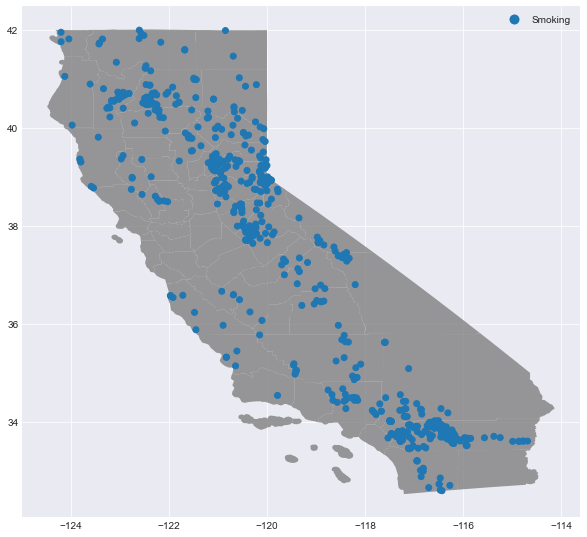

In [192]:
#visualize fires caused by smoking:
fig9, ax9 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax9, color = "grey", alpha = 0.8)
smoking.plot(column = "STAT_CAUSE_DESCR", ax = ax9, legend=True )

In [193]:
#dataframe for fires caused by railroads:
gdf10 = geo_df.copy()
railroad = gdf10.where(gdf10.STAT_CAUSE_DESCR == "Railroad").dropna(axis=0)
railroad

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
1232,FS-1435553,CMG3,RAILROAD,2006.0,2006-05-23,1703.0,6.0,Railroad,2006-05-23,0.20,A,41.643611,-122.008889,93.0,Siskiyou,CA,POINT (-122.00889 41.64361)
2214,FS-1443056,B6UX,RAIL,2006.0,2006-08-13,1440.0,6.0,Railroad,2006-08-13,0.10,A,33.920556,-116.750278,65.0,Riverside,CA,POINT (-116.75028 33.92056)
2606,FS-1445178,B6UU,GULCH,2006.0,2006-10-13,1459.0,6.0,Railroad,2006-10-14,3.00,B,41.467500,-120.933333,49.0,Modoc,CA,POINT (-120.93333 41.46750)
3000,FS-1447758,C65Q,TIES,2007.0,2007-01-14,821.0,6.0,Railroad,2007-01-14,0.10,A,34.427778,-118.351389,37.0,Los Angeles,CA,POINT (-118.35139 34.42778)
3013,FS-1448007,DAP8,POE,2007.0,2007-03-15,1300.0,6.0,Railroad,2007-03-15,0.10,A,39.750000,-121.469722,7.0,Butte,CA,POINT (-121.46972 39.75000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169944,FS-1523038,H62R,MDF DG GULCH 3,2014.0,2014-07-04,700.0,6.0,Railroad,2014-07-09,58.00,C,41.474444,-120.946111,49.0,Modoc,CA,POINT (-120.94611 41.47444)
169973,FS-1521591,H3YQ,MDF DG HOWARDS,2014.0,2014-05-01,1502.0,6.0,Railroad,2014-05-05,45.00,C,41.486111,-120.962778,49.0,Modoc,CA,POINT (-120.96278 41.48611)
170080,FS-1525019,JCZ2,FALL,2014.0,2014-08-18,1314.0,6.0,Railroad,2014-08-18,0.10,A,40.081667,-120.925278,63.0,Plumas,CA,POINT (-120.92528 40.08167)
170120,FS-1521063,H4XF,LAYMAN,2014.0,2014-05-23,1851.0,6.0,Railroad,2014-05-24,0.15,A,39.842222,-120.680556,63.0,Plumas,CA,POINT (-120.68056 39.84222)


<AxesSubplot:>

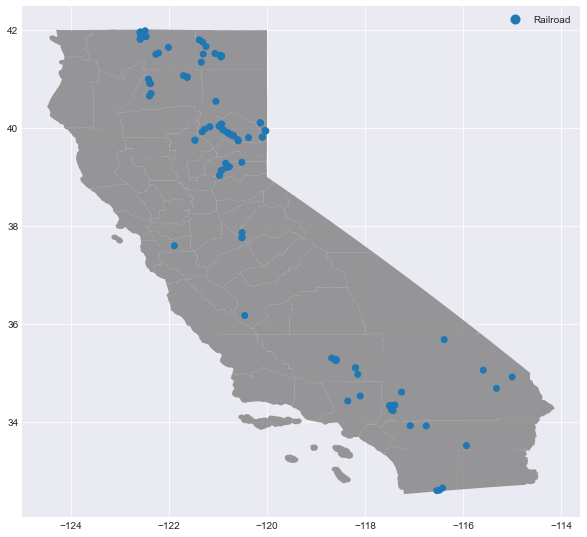

In [194]:
#visualize fires caused by railroad:
fig10, ax10 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax10, color = "grey", alpha = 0.8)
railroad.plot(column = "STAT_CAUSE_DESCR", ax = ax10, legend=True )

In [195]:
#dataframe for fires caused by fireworks:
gdf11 = geo_df.copy()
fireworks = gdf11.where(gdf11.STAT_CAUSE_DESCR == "Fireworks").dropna(axis=0)
fireworks.head()

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
36576,W-201,U964,CROWLEY2,1999.0,1999-05-07,1650.0,10.0,Fireworks,1999-05-07,0.1,A,37.58399,-118.72371,51.0,Mono,CA,POINT (-118.72371 37.58399)
39265,W-1254,D725,BORDER 69,1999.0,1999-07-02,1340.0,10.0,Fireworks,1999-07-03,20.0,C,32.58340,-116.65090,73.0,San Diego,CA,POINT (-116.65090 32.58340)
40418,W-91358,Z343,LMU CAROL,1999.0,1999-10-09,1530.0,10.0,Fireworks,1999-10-09,0.5,B,40.31320,-120.47770,35.0,Lassen,CA,POINT (-120.47770 40.31320)
45517,W-94707,D215,KELSO,2000.0,2000-07-03,2246.0,10.0,Fireworks,2000-07-03,0.3,B,35.63770,-118.25060,29.0,Kern,CA,POINT (-118.25060 35.63770)
48912,W-523171,CU04,MOKE,2006.0,2006-07-03,603.0,10.0,Fireworks,2006-07-03,15.0,C,38.33190,-120.67110,9.0,Calaveras,CA,POINT (-120.67110 38.33190)


<AxesSubplot:>

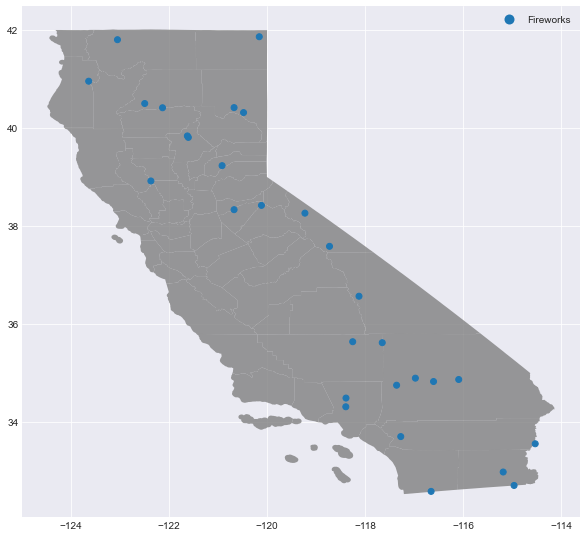

In [196]:
#visualize fires caused by fireworks:
fig11, ax11 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax11, color = "grey", alpha = 0.8)
fireworks.plot(column = "STAT_CAUSE_DESCR", ax = ax11, legend=True )

In [197]:
#dataframe for fires caused by structure fires:
gdf12 = geo_df.copy()
structure = gdf12.where(gdf12.STAT_CAUSE_DESCR == "Structure").dropna(axis=0)
structure.head()

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
40085,W-2633,D692,CCD SUSAN,1999.0,1999-07-09,1438.0,12.0,Structure,1999-07-09,0.1,A,40.0499,-120.12105,35.0,Lassen,CA,POINT (-120.12105 40.04990)
46826,W-113051,U857,RANCH,2002.0,2002-09-21,1349.0,12.0,Structure,2002-09-21,0.1,A,37.8330,-118.48320,51.0,Mono,CA,POINT (-118.48320 37.83300)
51799,W-123010,A7YD,ROCKY,2004.0,2004-07-15,1316.0,12.0,Structure,2004-07-15,510.0,E,35.0752,-118.33310,29.0,Kern,CA,POINT (-118.33310 35.07520)
52098,W-501467,BVU1,SOBOBA,2005.0,2005-06-22,1246.0,12.0,Structure,2005-06-25,2080.0,F,33.7978,-116.92700,65.0,Riverside,CA,POINT (-116.92700 33.79780)
52099,W-501500,BVT9,PARADISE,2005.0,2005-06-22,1300.0,12.0,Structure,2005-06-28,3082.0,F,34.0453,-116.56780,71.0,San Bernardino,CA,POINT (-116.56780 34.04530)


<AxesSubplot:>

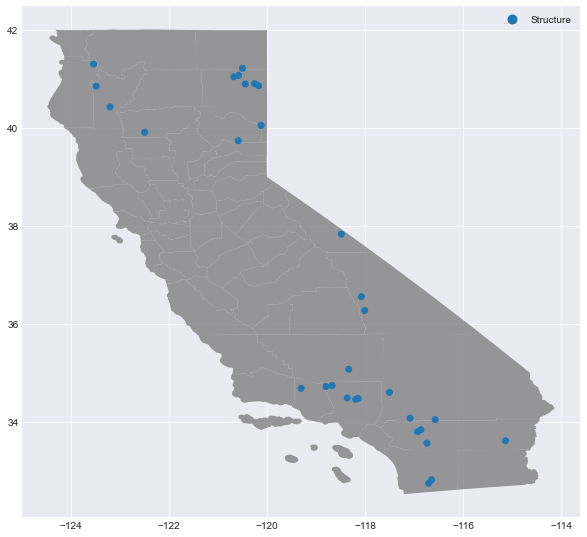

In [198]:
#visualize fires caused by structures:
fig12, ax12 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax12, color = "grey", alpha = 0.8)
structure.plot(column = "STAT_CAUSE_DESCR", ax = ax12, legend=True )

In [246]:
#create dataframe of number of fires for each county:

#copy original dataframe:
fire_by_county = dat.copy()

#groupby county to count number of fires in each county:
fire_by_county = fire_by_county.groupby("FIPS_NAME").count().reset_index()

#extract columns of interest:
fire_by_county = fire_by_county[["FPA_ID","FIPS_NAME"]]

#rename columns:
fire_by_county = fire_by_county.rename(columns = {"FPA_ID":"NUMBER_OF_FIRES", "FIPS_NAME":"NAME"})

#set NAME variable as index:
fire_by_county = fire_by_county.set_index("NAME")

In [247]:
#add geometries to number of fires dataframe (for mapping purposes):
geoms = county_map.copy()

#create dataframe with geometry data:
geoms = county_map[["NAME", "geometry"]].set_index("NAME")
geoms.head()

,geometry
NAME,
Sierra,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
Sacramento,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
Santa Barbara,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
Calaveras,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
Ventura,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


In [266]:
#add geometries to fire_count dataframe:
total_fires = fire_by_county.join(other = geoms)

#remove douglas county (not in california; in Nevada):
total_fires = total_fires.drop(total_fires.index[8])

#convert to geodataframe object:
total_fires = GeoDataFrame(total_fires)

#reset index:
total_fires = total_fires.reset_index()
total_fires.head()

,NAME,NUMBER_OF_FIRES,geometry
0,Alameda,23,"POLYGON ((-122.28089 37.70723, -122.28179 37.7..."
1,Alpine,323,"POLYGON ((-120.07334 38.70110, -120.07325 38.7..."
2,Amador,327,"POLYGON ((-121.02730 38.48137, -121.02730 38.4..."
3,Butte,689,"POLYGON ((-121.85651 39.53359, -121.85639 39.5..."
4,Calaveras,577,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."


<AxesSubplot:>

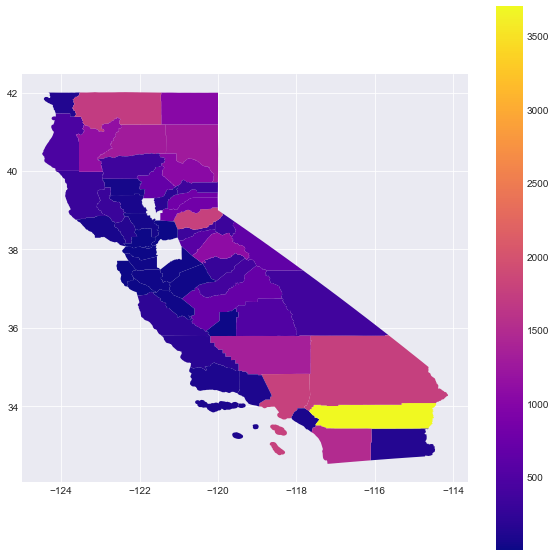

In [256]:
fig13, ax13 = plt.subplots(figsize = (10,10))
total_fires.plot(column = "NUMBER_OF_FIRES", ax = ax13, legend=True, cmap = "plasma" )

## NOTE: there is no data available for Sutter and San Joaquin counties

<AxesSubplot:>

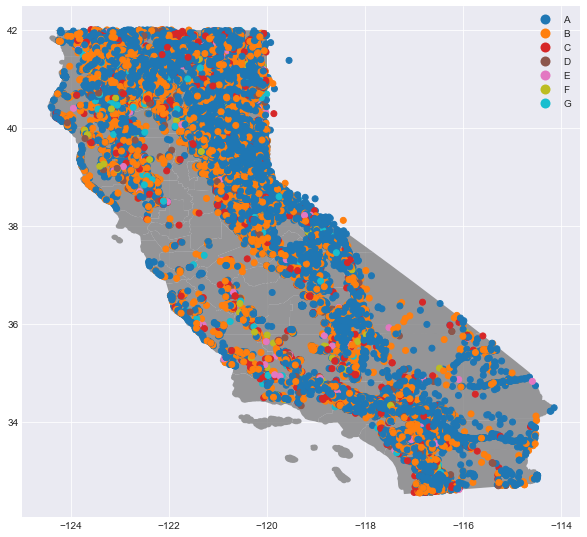

In [268]:
fig14, ax14 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax14, color = "grey", alpha = 0.8)
geo_df.plot(column = "FIRE_SIZE_CLASS", ax = ax14, legend=True )

This isnt a very useful plot, so let's examine fires greater than 1000 acres (classes F and G only)

In [274]:
#dataframe for class F and G wildfires:
gdf15 = geo_df.copy()
fire_class = gdf15.where(gdf15.FIRE_SIZE_CLASS.isin(["F","G"])).dropna(axis=0)
fire_class.head()

,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE,geometry
17,FS-1418881,BHA3,FREDS,2004.0,2004-10-13,1618.0,2.0,Equipment Use,2004-10-17,7700.0,G,38.780000,-120.260000,17.0,El Dorado,CA,POINT (-120.26000 38.78000)
1296,FS-1436048,CR7S,GOODALE,2006.0,2006-06-26,1437.0,1.0,Lightning,2006-06-30,3747.1,F,36.976389,-118.264444,27.0,Inyo,CA,POINT (-118.26444 36.97639)
1312,FS-1436358,CZA6,JACKASS,2006.0,2006-07-17,1615.0,1.0,Lightning,2006-07-21,6255.0,G,38.551667,-119.359444,51.0,Mono,CA,POINT (-119.35944 38.55167)
1477,FS-1437317,C04X,RUSH,2006.0,2006-07-24,1316.0,1.0,Lightning,2006-11-13,4850.0,F,41.103333,-123.036667,93.0,Siskiyou,CA,POINT (-123.03667 41.10333)
1586,FS-1437913,C0QH,RIDGE,2006.0,2006-07-22,1530.0,1.0,Lightning,2006-07-31,2418.0,F,34.900833,-119.279444,29.0,Kern,CA,POINT (-119.27944 34.90083)


<AxesSubplot:>

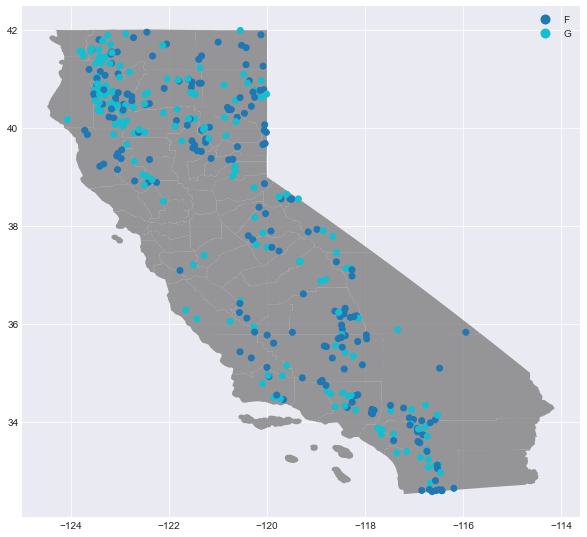

In [275]:
#visualize F and G wildfires on map:
fig15, ax15 = plt.subplots(figsize = (10,10))
county_map.plot(ax = ax15, color = "grey", alpha = 0.8)
fire_class.plot(column = "FIRE_SIZE_CLASS", ax = ax15, legend=True )